<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Prueba_Kolmogorov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRUEBA DE KOLMOGOROV-SMIRNOV
*"La prueba de Kolmogorov-Smirnov,..., se trata de un método no parámetrico sencillo para probar si existe una diferencia significativa entre una distribución de frecuencia observada y una distribución de frecuencia teórica"*

En este ejercicio, la frecuencia teórica es acorde a la distribución uniforme en [0,1].

**EJERCICIO:** Realice una prueba de bondad de ajuste con un nivel de aceptación del 95 %

#CÓDIGO


In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from scipy.stats import ksone

cadena=[0.8797, 0.3884, 0.6289, 0.8750, 0.5999, 0.8589, 0.9996, 0.2415, 0.3808, 0.9606, 0.9848, 0.3469, 0.7977, 0.5844, 0.8147, 0.6431, 0.7387, 0.5613, 0.0318, 0.7401, 0.4557, 0.1592, 0.8536, 0.8846, 0.3410, 0.1492, 0.8681, 0.5291, 0.3188, 0.5992, 0.9170, 0.2204, 0.5991, 0.5461, 0.5739, 0.3254, 0.0856, 0.2258, 0.4603, 0.5027, 0.8376, 0.6235, 0.3681, 0.2088, 0.1525, 0.2006, 0.4720, 0.4272, 0.6360, 0.0954]
orden=sorted(cadena) #ORDENA DE FORMA ASCENDENTE
n=len(orden)
intervalos = np.linspace(0,1,6) #DIVIDE [0,1] EN 5 INTERVALOS
conteo=np.histogram(cadena, bins=intervalos)[0] #REALIZA CONTEO EN INTERVALOS
fe=20
#LLENA DATA FRAME CON CALCULOS
data = pd.DataFrame({'Intervalos': ["(0.1-0.20]","(0.21-.40]","(0.41-0.60]","(0.61-0.80]","(0.81-1.0]"],'Fr. observada':conteo ,'Fr. esperada':fe, 'Fr. teórica':conteo/50})
data.loc['Suma total']=['Suma  total',sum(conteo),'',sum(conteo/50)]
print(tabulate(data, headers='keys', tablefmt='fancy_grid', floatfmt=".2f", showindex=False)) #IMPRIME TABLA


#CALCULA max D+
DP=[]
for i in range (0,49):
  DP.append((abs((i+1)/n-orden[i])))
DPmax=max(DP)
print(f"\nmax D+: {DPmax:.4f}")

#CALCULA max D-
DM=[]
for i in range(0, 49):
    DM.append((abs(i / n - orden[i])))
DMmax=max(DM)
print(f"max D-: {DMmax:.4f}")

#ESTADÍSTICO DE PRUEBA
D=max([DMmax,DPmax])
print(f"\nEstadístico = max(maxD+, maxD+) = {D:.4f}")

#AJUTE DE BONDAD
alfa=0.05
P_critico = ksone.ppf(1-alfa/2,n)

print(f"\nValor crítico: {P_critico}")
print(f"\nEstadpistico calculado: {D}")

# PRUEBA DE HIPOTESIS
if D > P_critico:
    print("\nSe RECHAZA la hipótesis nula")
else:
    print(f"\nSe ACEPTA la hipótesis nula: Los números tienen una distribución uniforme a un nivel de significancia del {alfa}")




╒══════════════╤═════════════════╤════════════════╤═══════════════╕
│ Intervalos   │   Fr. observada │ Fr. esperada   │   Fr. teórica │
╞══════════════╪═════════════════╪════════════════╪═══════════════╡
│ (0.1-0.20]   │               6 │ 20             │          0.12 │
├──────────────┼─────────────────┼────────────────┼───────────────┤
│ (0.21-.40]   │              12 │ 20             │          0.24 │
├──────────────┼─────────────────┼────────────────┼───────────────┤
│ (0.41-0.60]  │              13 │ 20             │          0.26 │
├──────────────┼─────────────────┼────────────────┼───────────────┤
│ (0.61-0.80]  │               7 │ 20             │          0.14 │
├──────────────┼─────────────────┼────────────────┼───────────────┤
│ (0.81-1.0]   │              12 │ 20             │          0.24 │
├──────────────┼─────────────────┼────────────────┼───────────────┤
│ Suma  total  │              50 │                │          1.00 │
╘══════════════╧═════════════════╧══════════════

# OBSERVACIÓN
 En internet se encuentran otras tablas de valores críticos de la prueba de Kolmogorov-Smirnov para una muestra son diferentes a la tabla que aparece en el classrom; incluso la fórmula ocupada en el ejemplo del PDF: $\frac{1.63}{\sqrt{n}}$ corresponde a la fórmula indicada en las tablas de internet.

(Hice un codigo abajo para utilizar los valores de las tablas que hay en classroom)

 La libreria

```
from scipy.stats import ksone
```
regresa valores de esta tabla:





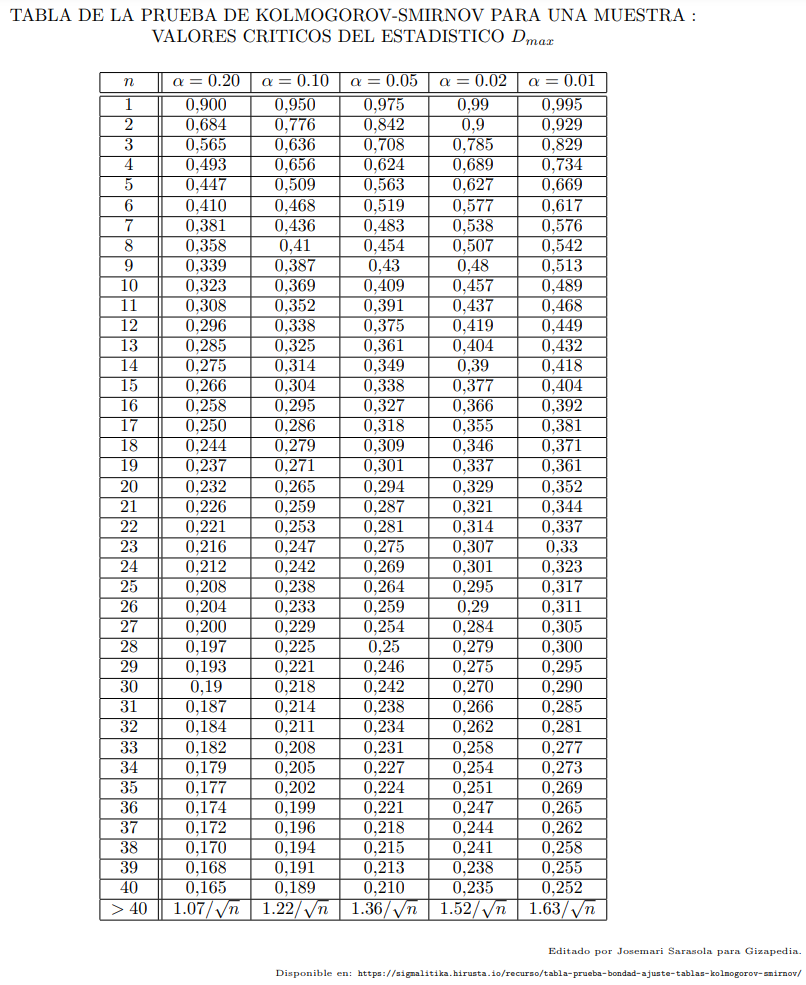


#CÓDIGO 2
Es el mismo código pero los puntos críticos son los de la tabla que aparece en classroom:

In [12]:
#FUNCION PARA IDENTIFICAR AL VALOR CRITICO DE ACUERDO A LA TABLA DADA
def Kol_val(alfa):
  K_tabla=[[0.3027, 0.3216, 0.3456, 0.3754, 0.4129],
    [0.2893, 0.3027, 0.3188, 0.3427, 0.3959],
    [0.2694, 0.2816, 0.2982, 0.3245, 0.3728],
    [0.2521, 0.2641, 0.2802, 0.3041, 0.3504],
    [0.2387, 0.2502, 0.2649, 0.2875, 0.3331],
    [0.2273, 0.2382, 0.2522, 0.2744, 0.3162],
    [0.2171, 0.2273, 0.241, 0.2616, 0.3037],
    [0.208, 0.2179, 0.2306, 0.2506, 0.2905],
    [0.2004, 0.2101, 0.2228, 0.2426, 0.2812],
    [0.1932, 0.2025, 0.2147, 0.2337, 0.2714],
    [0.1869, 0.1959, 0.2077, 0.2257, 0.2627],
    [0.1811, 0.1899, 0.2016, 0.2196, 0.2545],
    [0.1758, 0.1843, 0.1956, 0.2128, 0.2477],
    [0.1711, 0.1794, 0.1902, 0.2071, 0.2408],
    [0.1666, 0.1747, 0.1852, 0.2018, 0.2345],
    [0.1624, 0.17, 0.1803, 0.1965, 0.2285],
    [0.1589, 0.1666, 0.1764, 0.192, 0.2226],
    [0.1429, 0.1498, 0.1589, 0.1726, 0.201],
    [0.1315, 0.1378, 0.146, 0.159, 0.1848],
    [0.1291, 0.1353, 0.1432, 0.1559, 0.182],
    [0.1274, 0.1336, 0.1415, 0.1542, 0.1798],
    [0.1254, 0.1314, 0.1392, 0.1518, 0.177],
    [0.1236, 0.1295, 0.1373, 0.1497, 0.1747],
    [0.122, 0.1278, 0.1356, 0.1478, 0.172],
    [0.1203, 0.126, 0.1336, 0.1454, 0.1695],
    [0.1188, 0.1245, 0.132, 0.1436, 0.1677],
    [0.1174, 0.123, 0.1303, 0.1421, 0.1653],
    [0.1159, 0.1214, 0.1288, 0.1402, 0.1634],
    [0.1147, 0.1204, 0.1275, 0.1386, 0.1616],
    [0.1131, 0.1186, 0.1258, 0.1373, 0.1599],
    [0.1119, 0.1172, 0.1244, 0.1353, 0.1573],
    [0.1106, 0.1159, 0.1228, 0.1339, 0.1556],
    [0.1095, 0.1148, 0.1216, 0.1322, 0.1542],
    [0.1083, 0.1134, 0.1204, 0.1309, 0.1525],
    [0.1071, 0.1123, 0.1189, 0.1293, 0.1512],
    [0.1062, 0.1113, 0.118, 0.1282, 0.1499],
    [0.1047, 0.1098, 0.1165, 0.1269, 0.1476],
    [0.104, 0.1089, 0.1153, 0.1256, 0.1463],
    [0.103, 0.1079, 0.1142, 0.1246, 0.1457]]

  alpha=[0.20, 0.25,0.10,0.05,0.01]
  filas=list(range(4,21))
  a=[25]
  filas.extend(a)
  columnas=list(range(30,51))
  valor=filas+columnas

  i=0
  for i in range(len(alpha)):
    if alpha[i]==alfa:
      col=i
  i=0
  for i in range(len(valor)):
    if t[i]==n:
      fil=i

  P_critico=K_tabla[fil][col]
  return P_critico

In [13]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from scipy.stats import ksone

cadena=[0.8797, 0.3884, 0.6289, 0.8750, 0.5999, 0.8589, 0.9996, 0.2415, 0.3808, 0.9606, 0.9848, 0.3469, 0.7977, 0.5844, 0.8147, 0.6431, 0.7387, 0.5613, 0.0318, 0.7401, 0.4557, 0.1592, 0.8536, 0.8846, 0.3410, 0.1492, 0.8681, 0.5291, 0.3188, 0.5992, 0.9170, 0.2204, 0.5991, 0.5461, 0.5739, 0.3254, 0.0856, 0.2258, 0.4603, 0.5027, 0.8376, 0.6235, 0.3681, 0.2088, 0.1525, 0.2006, 0.4720, 0.4272, 0.6360, 0.0954]
orden=sorted(cadena) #ORDENA DE FORMA ASCENDENTE
n=len(orden)
intervalos = np.linspace(0,1,6) #DIVIDE [0,1] EN 5 INTERVALOS
conteo=np.histogram(cadena, bins=intervalos)[0] #REALIZA CONTEO EN INTERVALOS
fe=20
#LLENA DATA FRAME CON CALCULOS
data = pd.DataFrame({'Intervalos': ["(0.1-0.20]","(0.21-.40]","(0.41-0.60]","(0.61-0.80]","(0.81-1.0]"],'Fr. observada':conteo ,'Fr. esperada':fe, 'Fr. teórica':conteo/50})
data.loc['Suma total']=['Suma  total',sum(conteo),'',sum(conteo/50)]
print(tabulate(data, headers='keys', tablefmt='fancy_grid', floatfmt=".2f", showindex=False)) #IMPRIME TABLA


#CALCULA max D+
DP=[]
for i in range (0,49):
  DP.append((abs((i+1)/n-orden[i])))
DPmax=max(DP)
print(f"\nmax D+: {DPmax:.4f}")

#CALCULA max D-
DM=[]
for i in range(0, 49):
    DM.append((abs(i / n - orden[i])))
DMmax=max(DM)
print(f"max D-: {DMmax:.4f}")

#ESTADÍSTICO DE PRUEBA
D=max([DMmax,DPmax])
print(f"\nEstadístico = max(maxD+, maxD+) = {D:.4f}")

#AJUTE DE BONDAD
alfa=0.05
Kol_val(alfa) #FUNCION PARA BUSCAR VALOR CRITICO


print(f"\nValor crítico: {P_critico}")
print(f"\nEstadpistico calculado: {D}")

# PRUEBA DE HIPOTESIS
if D > P_critico:
    print("\nSe RECHAZA la hipótesis nula")
else:
    print(f"\nSe ACEPTA la hipótesis nula: Los números tienen una distribución uniforme a un nivel de significancia del {alfa}")




╒══════════════╤═════════════════╤════════════════╤═══════════════╕
│ Intervalos   │   Fr. observada │ Fr. esperada   │   Fr. teórica │
╞══════════════╪═════════════════╪════════════════╪═══════════════╡
│ (0.1-0.20]   │               6 │ 20             │          0.12 │
├──────────────┼─────────────────┼────────────────┼───────────────┤
│ (0.21-.40]   │              12 │ 20             │          0.24 │
├──────────────┼─────────────────┼────────────────┼───────────────┤
│ (0.41-0.60]  │              13 │ 20             │          0.26 │
├──────────────┼─────────────────┼────────────────┼───────────────┤
│ (0.61-0.80]  │               7 │ 20             │          0.14 │
├──────────────┼─────────────────┼────────────────┼───────────────┤
│ (0.81-1.0]   │              12 │ 20             │          0.24 │
├──────────────┼─────────────────┼────────────────┼───────────────┤
│ Suma  total  │              50 │                │          1.00 │
╘══════════════╧═════════════════╧══════════════